In [4]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore', '.*do not.*',)

In [5]:
# data source: `https://datasets.omdena.com/dataset/labor-stats-2005-2021-(texas--usa)`
df = pd.read_csv('Tx_LaborStats_2005-2021.csv')
df.head()

,Year,Period,Area,Area Type,Adjustment,Employment,Civilian Labor Force,Unemployment,Unemployment Rate
0,2005,March,Texas,Texas,Not Adjusted,"10,457,456","11,066,337","608,881",5.5
1,2005,March,Texas,Texas,Adjusted,"10,502,785","11,125,846","623,061",5.6
2,2005,June,Texas,Texas,Not Adjusted,"10,557,049","11,181,612","624,563",5.6
3,2005,June,Texas,Texas,Adjusted,"10,569,961","11,163,389","593,428",5.3
4,2005,September,Texas,Texas,Not Adjusted,"10,589,753","11,216,770","627,017",5.6


In [6]:
df.shape

(16896, 9)

In [3]:
df['Period'].unique()

array(['March', 'June', 'September', 'December'], dtype=object)

In [4]:
len(df.Area.unique())

255

In [5]:
df['Area Type'].unique()

array(['Texas', 'County'], dtype=object)

In [6]:
df.describe()

,Year,Unemployment Rate
count,16896.000000,16896.000000
mean,2012.757576,5.575112
std,4.767647,2.321590
min,2005.000000,0.700000
25%,2009.000000,3.975000
50%,2013.000000,5.000000
75%,2017.000000,6.700000
max,2021.000000,20.500000


In [7]:
df = df.dropna()

In [8]:
df['Year'] = df['Year'].astype(str)

In [9]:
df_not_adjusted = df[df.Adjustment=='Not Adjusted']

In [10]:
years = df.Year.unique()
print(years)

['2005' '2006' '2007' '2008' '2009' '2010' '2011' '2012' '2013' '2014'
 '2015' '2016' '2017' '2018' '2019' '2020' '2021']


In [11]:
def calculate_mean_rate(yrs, df):
    result = []
    for i in range(len(yrs)):
        result.append(round(df_not_adjusted.loc[df_not_adjusted['Year']==yrs[i],'Unemployment Rate'].mean(),1))
    return result 
    
mean_unemployed_rate = calculate_mean_rate(years, df_not_adjusted)  
print(mean_unemployed_rate)

[5.2, 4.8, 4.3, 4.7, 7.5, 8.0, 7.7, 6.4, 6.1, 4.9, 4.8, 5.2, 4.4, 3.9, 3.5, 7.0, 6.8]


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

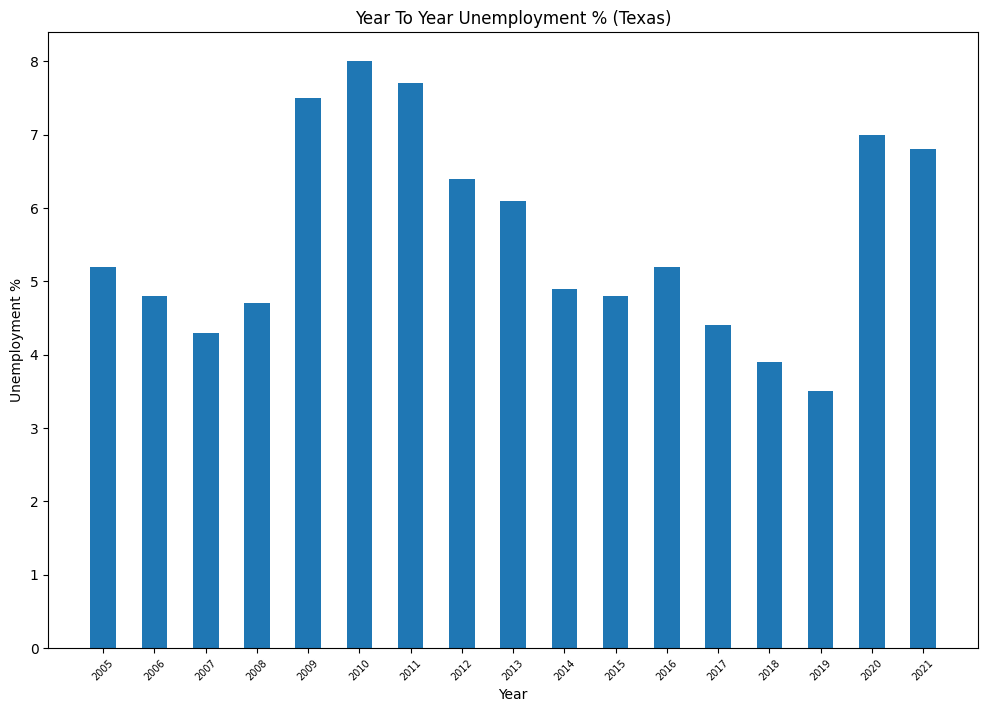

In [13]:
plt.figure(figsize=(12, 8))

plt.title('Year To Year Unemployment % (Texas)')
plt.xlabel("Year")
plt.ylabel("Unemployment %")
plt.bar(range(len(years)), mean_unemployed_rate, tick_label=years, width=0.5)
plt.xticks(rotation=45, fontsize=7)
plt.show()